In [22]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
person = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P1_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a011023e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a0144e8c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a0144d1b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a0110e74d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a0110e6b50>],
 'means': []}

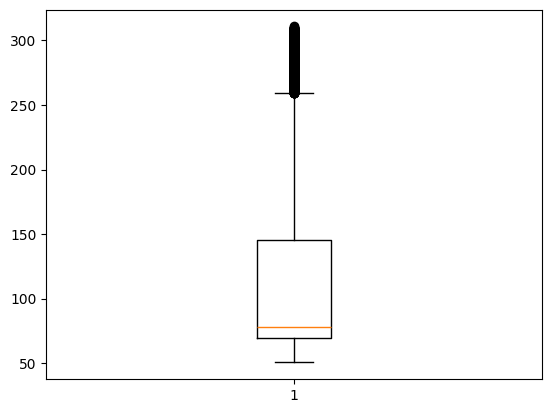

In [24]:
plt.boxplot(person["RHeel_pos_Z"])

In [25]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in person.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = person.loc[frame-i,"RHeel_pos_Z"]
            next = person.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  207 :  56.716
R -  330 :  58.557
R -  447 :  55.451
R -  569 :  55.4
R -  679 :  55.935
R -  795 :  62.007
R -  909 :  65.077
R -  1023 :  63.527
R -  1134 :  63.326
R -  1253 :  63.448
R -  1362 :  56.085
R -  1471 :  56.853
R -  1587 :  56.268
R -  1704 :  53.922
R -  1822 :  57.741
R -  1931 :  58.778
R -  2044 :  65.314
R -  2159 :  61.662
R -  2276 :  63.734
R -  2399 :  64.44
R -  2512 :  58.463
R -  2630 :  55.672
R -  2747 :  57.278
R -  2874 :  51.744
R -  2993 :  52.986
R -  3109 :  56.6
R -  3229 :  61.243
R -  3350 :  63.133
R -  3487 :  58.706
R -  3626 :  60.048
R -  3762 :  53.966
R -  3898 :  54.187
R -  4031 :  53.681
R -  4169 :  52.181
R -  4304 :  55.272
R -  4436 :  59.538
R -  4563 :  66.483
R -  4692 :  60.313
R -  4818 :  62.204
R -  4945 :  60.151
R -  5065 :  57.465
R -  5186 :  57.731
R -  5315 :  54.313
R -  5438 :  52.531
R -  5560 :  52.896
R -  5677 :  62.26
R -  5795 :  65.577
R -  5919 :  61.344
R -  6039 :  66.267
R -  6148 :  57.912
R -  6265 :  

In [26]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in person.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = person.loc[frame-i,"LHeel_pos_Z"]
            next = person.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  269 :  49.137
L -  389 :  51.579
L -  506 :  47.703
L -  621 :  50.44
L -  738 :  55.805
L -  854 :  58.695
L -  966 :  60.866
L -  1078 :  58.084
L -  1191 :  56.561
L -  1306 :  54.378
L -  1417 :  48.198
L -  1530 :  52.609
L -  1646 :  49.356
L -  1760 :  49.507
L -  1875 :  55.999
L -  1988 :  59.405
L -  2104 :  61.223
L -  2219 :  59.521
L -  2337 :  58.528
L -  2452 :  55.751
L -  2573 :  53.146
L -  2688 :  53.092
L -  2811 :  50.381
L -  2936 :  47.799
L -  3054 :  51.812
L -  3170 :  55.512
L -  3291 :  55.758
L -  3418 :  58.445
L -  3559 :  55.255
L -  3693 :  52.645
L -  3829 :  45.817
L -  3964 :  51.212
L -  3965 :  51.212
L -  4099 :  45.275
L -  4238 :  48.478
L -  4373 :  55.03
L -  4497 :  56.64
L -  4625 :  58.472
L -  4755 :  58.169
L -  4883 :  57.788
L -  5004 :  54.96
L -  5125 :  48.691
L -  5250 :  52.786
L -  5376 :  48.364
L -  5503 :  48.734
L -  5622 :  54.445
L -  5736 :  58.438
L -  5856 :  58.645
L -  5980 :  56.451
L -  6094 :  56.728
L -  6206 :

In [27]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [28]:
steps = pd.DataFrame(steps)
steps

,0,1
0,207,56.716
1,269,49.137
2,330,58.557
3,389,51.579
4,447,55.451
...,...,...
153,9482,58.850
154,9545,57.439
155,9611,62.747
156,9675,56.266


In [50]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [51]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [55]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [57]:
#Update Time Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+float(start_music[start_music[0]=='P1_M1'][1].item())
m2[0] = (m2[0]*100)+float(start_music[start_music[0]=='P1_M2'][1].item())
m3[0] = (m3[0]*100)+float(start_music[start_music[0]=='P1_M3'][1].item())

(0.0, 9800.0)

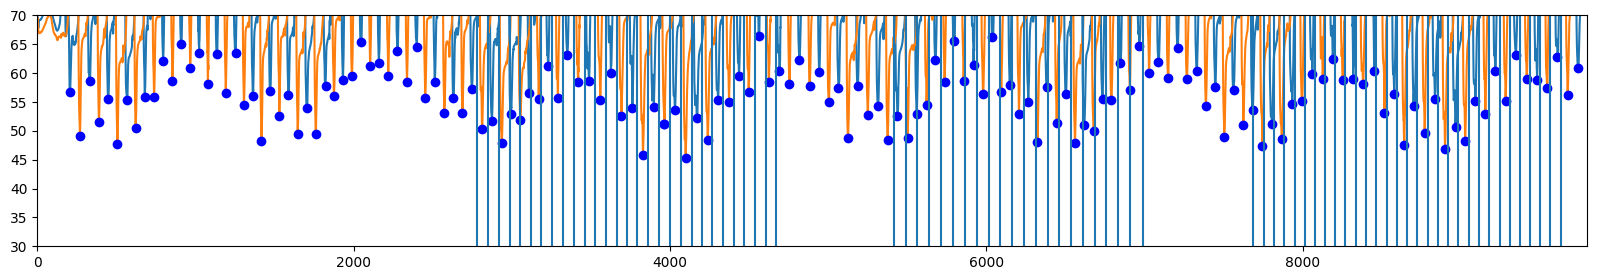

In [59]:
plt.figure(figsize=(20,3))
plt.plot(person)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([0, 9800])

In [60]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

95.17437844913604

In [61]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

96.0

# Person - M1

In [62]:
m1_start = start_music[start_music[0]=='P1_M1'][1].item()
m1_end = start_music[start_music[0]=='P1_M2'][1].item()-500
print(m1_start)
print(m1_end)

2630
4730


In [63]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [64]:
steps_in_m1_range.count()

34

In [65]:
beats_in_m1_range.count()

29

In [66]:
(29/20)*60

87.0

In [84]:
(34/20)*60

102.0

In [67]:
beats_in_m1_range

1     2780.349206
2     2848.848073
3     2917.346939
4     2985.845805
5     3052.022676
6     3119.360544
7     3186.698413
8     3256.358277
9     3324.857143
10    3393.356009
11    3461.854875
12    3528.031746
13    3595.369614
14    3662.707483
15    3727.723356
16    3792.739229
17    3861.238095
18    3930.897959
19    3999.396825
20    4067.895692
21    4136.394558
22    4202.571429
23    4267.587302
24    4333.764172
25    4402.263038
26    4469.600907
27    4536.938775
28    4604.276644
29    4671.614513
Name: 0, dtype: float64

In [68]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100)*60

92.00189916749818

In [69]:
steps_in_m1_range.count()

34

In [70]:
steps_in_m1_range.max()-steps_in_m1_range.min()

2062

In [71]:
(34/(1866/100))*60

109.32475884244373

In [72]:
#all WALKING M1
steps_in_m1_range.count()/((m1_end-m1_start)/100)*60

97.14285714285714

In [73]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [74]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [75]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100)*60

99.08883826879271

In [76]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100)*60

92.7683246045788

In [77]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

235.20376885862063

In [78]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 34]

(2610.0, 4750.0)

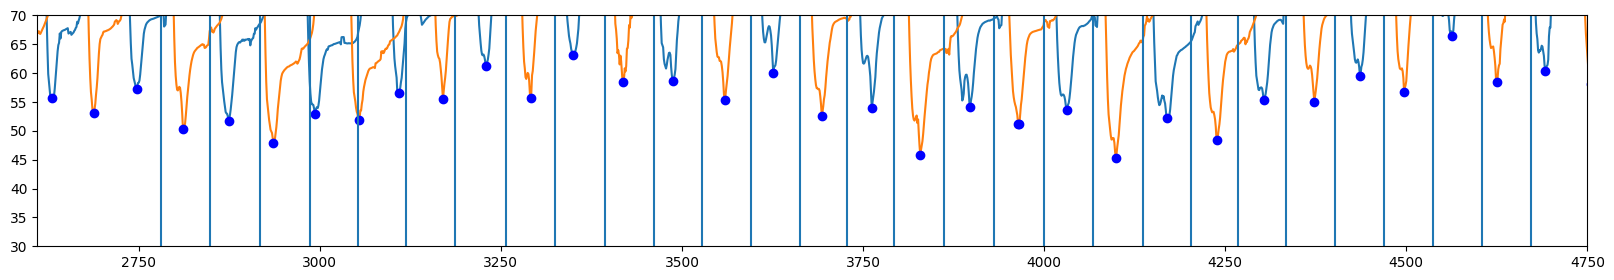

In [79]:
plt.figure(figsize=(20,3))
plt.plot(person)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([30, 70])
plt.xlim([m1_start-20, m1_end+20])

# Person - M2

In [80]:
m2_start = start_music[start_music[0]=='P1_M2'][1].item()
m2_end = start_music[start_music[0]=='P1_M3'][1].item()-500
print(m2_start)
print(m2_end)

5230
7030


In [81]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [82]:
#all MUSIC M2
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [83]:
#all WALKING M2
steps_in_m2_range.count()/((m2_end-m2_start)/100)*60

103.33333333333334

In [84]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [85]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [86]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

106.19469026548673

In [87]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5210.0, 7050.0)

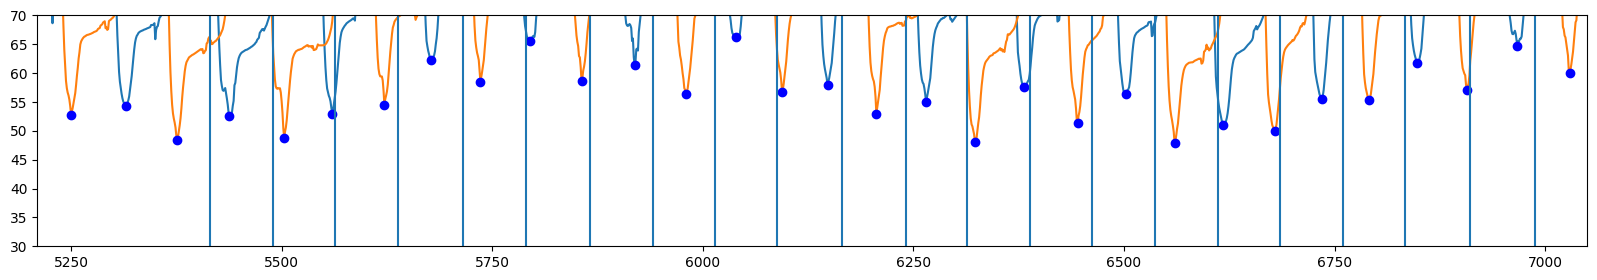

In [88]:
plt.figure(figsize=(20,3))
plt.plot(person)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([30, 70])
plt.xlim([m2_start-20, m2_end+20])

# Person - M3

In [89]:
m3_start = start_music[start_music[0]=='P3_M3'][1].item()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7474
9631.9863946


In [90]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [91]:
#all MUSIC M3
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [92]:
#all WALKING M3
steps_in_m3_range.count()/((m3_end-m3_start)/100/60)

94.532570043294

In [93]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [94]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [95]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

96.34551495016612

In [96]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7454.0, 9651.9863946)

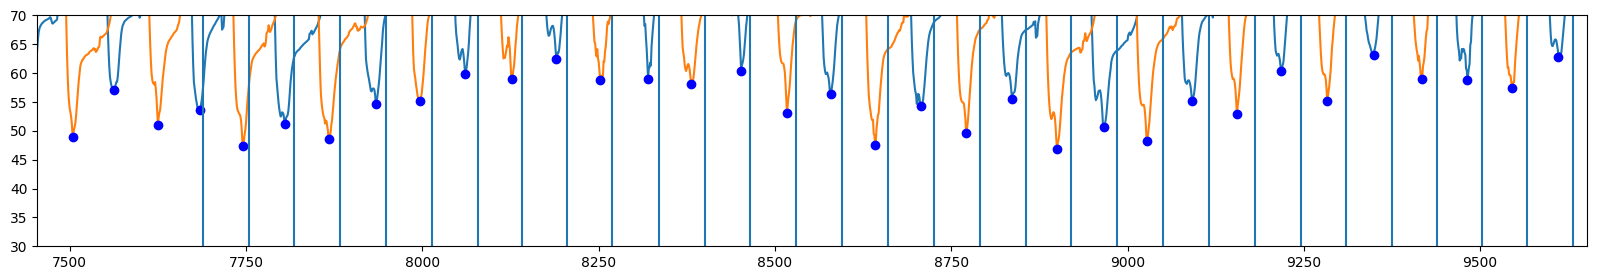

In [97]:
plt.figure(figsize=(20,3))
plt.plot(person)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([m3_start-20, m3_end+20])